In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import RobustScaler
plt.style.use("bmh")
!pip install ta
import ta
from datetime import timedelta

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

  Created wheel for ta: filename=ta-0.7.0-py3-none-any.whl size=28716 sha256=8c8138a99a4e99c13a7323e162db51fe87de6d3309f9956d3099d366f2e71287
  Stored in directory: /root/.cache/pip/wheels/5e/74/e0/72395003bd1d3c8f3f5860c2d180ff15699e47a2733d8ebd38
Successfully built ta


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Group 6 - Stock Price Prediction Project (MSBA)/Code & New Datasets/May 2021/QQQ-201901-202104.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df = df[['Date_StartTime','Date', 'Time Interval',
         'Close', 'Net Chg', 'Open', 'High', 'Low',
         'Tick Count', 'Volume']]
df.head()

,Date_StartTime,Date,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,2019-01-02 09:30:00,02JAN2019,09:30 - 09:31,151.25,-3.01,150.990,151.320,150.88,1419.0,489044
1,2019-01-02 09:31:00,02JAN2019,09:31 - 09:32,151.48,0.23,151.250,151.620,151.25,1324.0,265464
2,2019-01-02 09:32:00,02JAN2019,09:32 - 09:33,151.48,0.00,151.470,151.700,151.47,1054.0,162868
3,2019-01-02 09:33:00,02JAN2019,09:33 - 09:34,151.59,0.11,151.475,151.700,151.38,1249.0,227503
4,2019-01-02 09:34:00,02JAN2019,09:34 - 09:35,151.65,0.06,151.600,151.775,151.49,1155.0,225903


In [ ]:
df.set_index("Date_StartTime", drop = True, inplace = True)

# Remove holiday volume NAs
df = df[df['Volume'] != 'N.A.']
df['Volume'] = df['Volume'].astype(float)

In [ ]:
df = ta.add_all_ta_features(df,
                            open = "Open",
                            high = "High",
                            low = "Low",
                            close = "Close",
                            volume = "Volume",
                            fillna = True)

df.head()

/usr/local/lib/python3.7/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.7/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,Date,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date_StartTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02 09:30:00,02JAN2019,09:30 - 09:31,151.25,-3.01,150.990,151.320,150.88,1419.0,489044.0,333439.090909,489044.0,0.681818,0.000000,50.0,0.000000,0.000000,-171765.543237,1000.000000,151.150000,0.0,151.250000,151.250000,151.250000,0.000000,0.000000,0.0,0.0,151.150000,151.590000,150.710000,0.582203,0.613636,0.0,0.0,150.88,151.320,151.1000,0.290909,0.840909,0.0,...,0.000000,-35.117798,1.000000,0.000000,81.882043,-351.226035,-351.226035,0.000000,151.1000,151.1000,151.1000,151.1000,233.111019,233.075845,4.0,4.0,0.0,-1.00,-1.00,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.000000,84.090909,84.090909,-15.909091,0.0,151.250000,0.0,0.000000,0.000000,0.000000,-35.122603,0.000000,0.000000
2019-01-02 09:31:00,02JAN2019,09:31 - 09:32,151.48,0.23,151.250,151.620,151.25,1324.0,265464.0,398011.415233,754508.0,0.527511,61056.720000,100.0,46.691830,46.691830,-171361.304052,1001.520661,151.255551,0.0,151.365000,151.595000,151.135000,0.303901,0.750000,0.0,0.0,151.300000,151.705000,150.895000,0.535360,0.722222,0.0,0.0,150.88,151.620,151.2500,0.488884,0.810811,0.0,...,0.008109,0.000297,1.974382,66.666667,81.767043,-350.732752,-350.979393,0.246641,151.2500,151.2500,151.2500,151.2500,233.111019,233.075845,8.0,4.0,4.0,-1.00,-1.00,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,28.395062,81.081081,82.585995,-18.918919,0.0,151.351296,0.0,-3.774836,-0.754967,-3.019869,0.152066,0.151951,0.152066
2019-01-02 09:32:00,02JAN2019,09:32 - 09:33,151.48,0.00,151.470,151.700,151.47,1054.0,162868.0,249305.850016,917376.0,0.271760,52334.331429,100.0,21.182798,33.937314,403.680793,1001.520661,151.307827,0.0,151.403333,151.620179,151.186487,0.286448,0.676777,0.0,0.0,151.383333,151.730000,151.036667,0.457998,0.639423,0.0,0.0,150.88,151.700,151.2900,0.541600,0.731707,0.0,...,0.011708,0.000780,2.879983,71.428571,81.728710,-350.568324,-350.842370,0.274046,151.2900,151.2900,151.2900,151.2900,233.111019,233.075845,8.0,4.0,4.0,-1.00,151.32,0.0,1.0,0.0,100.0,0.0,0.0,0.0,100.0,23.076923,73.170732,79.447574,-26.829268,0.0,151.407963,0.0,-8.851138,-2.374201,-6.476936,0.000000,0.000000,0.152066
2019-01-02 09:33:00,02JAN2019,09:33 - 09:34,151.59,0.11,151.475,151.700,151.38,1249.0,227503.0,320400.537516,1144879.0,0.279855,48433.045510,100.0,-6.329587,20.515014,165.205506,1001.520661,151.357275,0.0,151.450000,151.697790,151.202210,0.327224,0.782497,0.0,0.0,151.426667,151.766667,151.086667,0.449062,0.740196,0.0,0.0,150.88,151.700,151.2900,0.541433,0.865854,0.0,...,0.010580,0.001506,3.776847,62.650602,81.682043,-350.368152,-350.723816,0.355664,151.2900,151.2900,151.2900,151.2900,233.111019,233.075845,16.0,4.0,12.0,151.47,151.32,1.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,33.088235,86.585366,80.279060,-13.414634,0.0,151.487961,0.0,-11.863663,-4.272094,-7.591570,0.072617,0.072590,0.224793
2019-01-02 0

In [ ]:
df.shape

(226624, 92)

In [ ]:
scale_col = [ 'volume_adi', 'volume_obv', 'volume_cmf',
       'volume_fi', 'volume_mfi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_nvi', 'volume_vwap', 'volatility_atr', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_ui', 'trend_macd', 'trend_macd_signal', 'trend_macd_diff',
       'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base', 'trend_ichimoku_a', 'trend_ichimoku_b',
       'trend_visual_ichimoku_a', 'trend_visual_ichimoku_b', 'trend_aroon_up',
       'trend_aroon_down', 'trend_aroon_ind', 'trend_psar_up',
       'trend_psar_down', 'trend_psar_up_indicator',
       'trend_psar_down_indicator', 'trend_stc', 'momentum_rsi',
       'momentum_stoch_rsi', 'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d',
       'momentum_tsi', 'momentum_uo', 'momentum_stoch',
       'momentum_stoch_signal', 'momentum_wr', 'momentum_ao', 'momentum_kama',
       'momentum_roc', 'momentum_ppo', 'momentum_ppo_signal',
       'momentum_ppo_hist', 'others_dr', 'others_dlr', 'others_cr']

In [ ]:
#Create the Test set
X = df[scale_col].values    
y = df['Close'].values    

In [ ]:
split = int(len(df2) * 0.8)
print(split)

31368


In [ ]:
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

In [ ]:
len(X_train) == len(y_train) and len(X_test) == len(y_test)

True

MixMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Labeling

In [ ]:
n = 60  
Xtrain = []
ytrain = []
Xtest = []
ytest = []

for i in range(n, len(X_train_scaled)): 
    Xtrain.append(X_train_scaled[(i - n):i, :X_train_scaled.shape[1]])
    ytrain.append(y_train[i]) # predict the next record

for i in range(n, len(X_test_scaled)):
    Xtest.append(X_test_scaled[(i - n):i, :X_test_scaled.shape[1]])
    ytest.append(y_test[i]) # predict the next record

In an LSTM network the input for each LSTM layer needs to contain the following:

The number of observations

The time

The features

In [ ]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
#Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
#Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [ ]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(31308, 60, 83)
(31308,)
---
(7782, 60, 83)
(7782,)


In [ ]:
Xtrain.shape[2]

83

Building Model 

In [ ]:
# How many periods looking back to learn
n_per_in  = 60

# How many periods to predict
n_per_out = 1


In [ ]:
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

In [ ]:
# Instatiating the model
model = Sequential()

# Activation
activ = "tanh"

# Input layer
model.add(LSTM(60, 
               activation=activ, 
               return_sequences=True, 
               input_shape=(60, Xtrain.shape[2])))

# Hidden layers
layer_maker(n_layers=2, 
        n_nodes=30, 
            activation=activ,
            drop=1,
            d_rate=.1)

# Final Hidden layer
model.add(LSTM(70, activation=activ))

# Output layer
model.add(Dense(1))

# Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 60)            34560     
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 30)            10920     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 30)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 30)            7320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 30)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 80)                35520     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error']) #metrics=mse


In [ ]:
model.fit(Xtrain,
          ytrain,epochs=30, batch_size=32, validation_split=0.1)

Train on 28177 samples, validate on 3131 samples
Epoch 1/100
28177/28177 [==============================] - 182s 6ms/step - loss: 74489.3820 - mean_squared_error: 74489.3438 - val_loss: 56293.7090 - val_mean_squared_error: 56293.7031
Epoch 2/100
28177/28177 [==============================] - 179s 6ms/step - loss: 43762.1744 - mean_squared_error: 43762.1758 - val_loss: 31643.4701 - val_mean_squared_error: 31643.4668
Epoch 3/100
28177/28177 [==============================] - 179s 6ms/step - loss: 23524.7540 - mean_squared_error: 23524.7383 - val_loss: 15721.5808 - val_mean_squared_error: 15721.5791
Epoch 4/100
28177/28177 [==============================] - 180s 6ms/step - loss: 10941.0073 - mean_squared_error: 10941.0049 - val_loss: 6407.4388 - val_mean_squared_error: 6407.4399
Epoch 5/100
28177/28177 [==============================] - 179s 6ms/step - loss: 3969.7734 - mean_squared_error: 3969.7725 - val_loss: 1806.8459 - val_mean_squared_error: 1806.8461
Epoch 6/100
28177/28177 [=======

In [ ]:
y_pred=model.predict(Xtest)

In [ ]:
y_pred

array([[328.23297],
       [328.2489 ],
       [327.93732],
       ...,
       [336.93872],
       [336.91034],
       [336.8873 ]], dtype=float32)

In [ ]:
y_test

array([323.94, 323.86, 323.8 , ..., 337.4 , 337.4 , 337.99])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# calculate root mean squared error 
#squared=False returns RMSE value
print("RMSE: {:.2f}".format(mean_squared_error(y_test[n:], y_pred, squared = False)))

RMSE: 1.78


In [ ]:
pred = np.concatenate(y_pred)

In [ ]:
results = pd.DataFrame({"y_test":y_test[n:], "pred": pred})
print(results.shape)
results.head()

(7782, 2)


,y_test,pred
0,328.40,328.232971
1,328.57,328.248901
2,328.56,327.937317
3,328.57,327.983093
4,328.65,328.104492


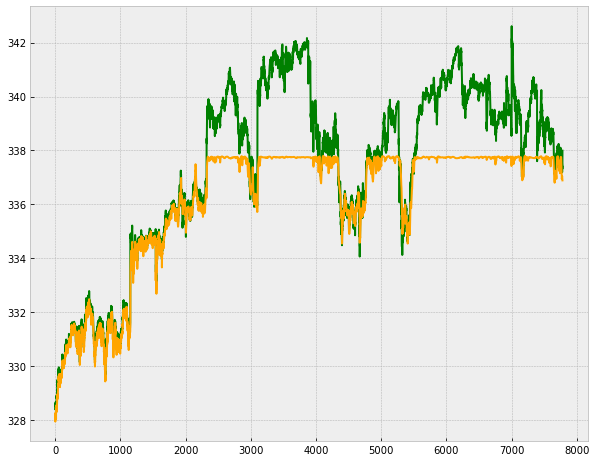

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(results.y_test, color = 'green')
plt.plot(results.pred, color = 'orange')
plt.show()

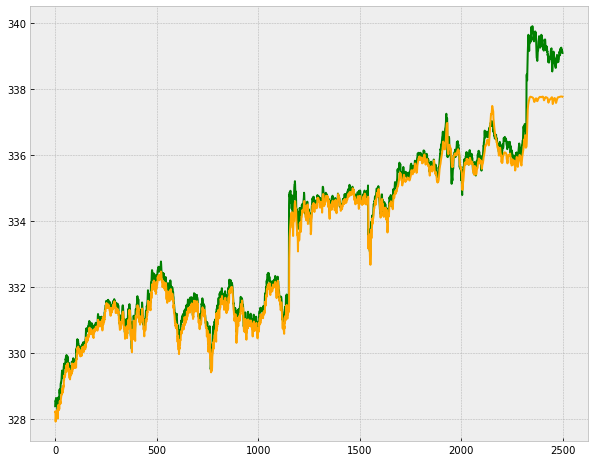

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(results.y_test[0:2500], color = 'green')
plt.plot(results.pred[0:2500], color = 'orange')
plt.show()